In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [287]:
df = pd.read_csv("/content/ai_impact_jobs_2010_2025.csv")

In [288]:
#renomeando algumas colunas
df.rename(columns={
    'salary_usd' : 'Salário_em_Dólar',
    'automation_risk_score' : 'Risco_de_Automação',
    'seniority_level' : 'Nível_de_Senioridade',
    'ai_intensity_score' : 'Intensidade_de_IA',
    'ai_job_displacement_risk' : "Risco_de_deslocamento_por_IA"
 }, inplace=True )

In [289]:
df.head()

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,Nível_de_Senioridade,ai_mentioned,ai_keywords,Intensidade_de_IA,core_skills,ai_skills,Salário_em_Dólar,salary_change_vs_prev_year_percent,Risco_de_Automação,reskilling_required,Risco_de_deslocamento_por_IA,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,True,reinforcement learning,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,False,NaN,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,False,NaN,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,False,NaN,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,False,NaN,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   Nível_de_Senioridade                5000 non-null   object 
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         1623 no

In [291]:
df.select_dtypes(include = [int, float])

,posting_year,Intensidade_de_IA,Salário_em_Dólar,salary_change_vs_prev_year_percent,Risco_de_Automação,job_description_embedding_cluster
0,2018,0.81,61586,12.68,0.11,14
1,2015,0.04,62045,-3.98,0.71,19
2,2016,0.15,27035,3.55,0.86,2
3,2015,0.19,72894,-2.80,0.70,15
4,2014,0.11,57215,0.85,0.87,13
...,...,...,...,...,...,...
4995,2022,0.12,41317,4.62,0.88,17
4996,2018,0.07,37089,-4.26,0.79,13
4997,2019,0.05,81651,-4.95,0.64,19
4998,2016,0.87,107897,-0.23,0.33,14


Text(0.5, 1.02, 'Relação entre Salário e Risco de Automação')

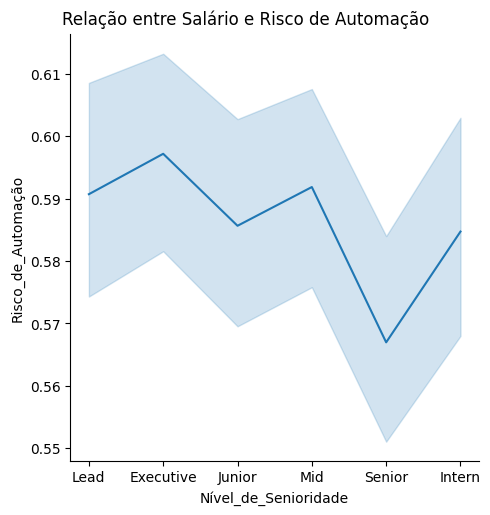

In [292]:
a = sns.relplot( x='Nível_de_Senioridade', y='Risco_de_Automação', data = df, kind = "line")
a.fig.suptitle('Relação entre Salário e Risco de Automação',
               fontsize=12,
               y=1.02)

In [293]:
a = df[df["core_skills"].str.contains("Python", na=False)]
sci = df[df["job_title"] == "Data Scientist"]
b = sci["Risco_de_Automação"].mean()
am = a["Risco_de_Automação"].mean()
mg = df["Risco_de_Automação"].mean()
print(f"Risco de Automação para profissões envolvendo Python: {am:.2f}")
print(f"Risco de Automação para para profissões em geral: {mg:.2f}")
print(f"Risco de Automação para Data Scientist: {b:.2f}")

Risco de Automação para profissões envolvendo Python: 0.58
Risco de Automação para para profissões em geral: 0.59
Risco de Automação para Data Scientist: 0.59


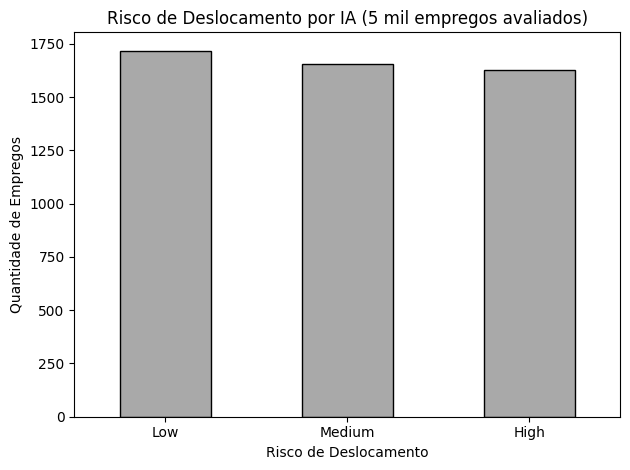

In [294]:
df.Risco_de_deslocamento_por_IA.value_counts().plot(kind = "bar", rot = 0, edgecolor = "black", color = "darkgray")
plt.title("Risco de Deslocamento por IA (5 mil empregos avaliados)")
plt.xlabel("Risco de Deslocamento")
plt.ylabel("Quantidade de Empregos")
plt.tight_layout()

In [295]:
industrias = ['Education', 'Energy', 'Finance', 'Government', 'Manufacturing',
       'Healthcare', 'Agriculture', 'Tech', 'Retail']

for industria in industrias:
    subset = df[df["industry"] == industria]
    media_risco = subset["Risco_de_Automação"].mean()
    n_amostras = len(subset)
    print(f"{industria}:")
    print(f"Média do risco de automação: {media_risco:.2f}")
    print(f"Número de profissionais: {n_amostras}")
    print(f"")

Education:
Média do risco de automação: 0.60
Número de profissionais: 535

Energy:
Média do risco de automação: 0.60
Número de profissionais: 522

Finance:
Média do risco de automação: 0.51
Número de profissionais: 549

Government:
Média do risco de automação: 0.61
Número de profissionais: 546

Manufacturing:
Média do risco de automação: 0.61
Número de profissionais: 573

Healthcare:
Média do risco de automação: 0.61
Número de profissionais: 560

Agriculture:
Média do risco de automação: 0.62
Número de profissionais: 569

Tech:
Média do risco de automação: 0.52
Número de profissionais: 579

Retail:
Média do risco de automação: 0.60
Número de profissionais: 567



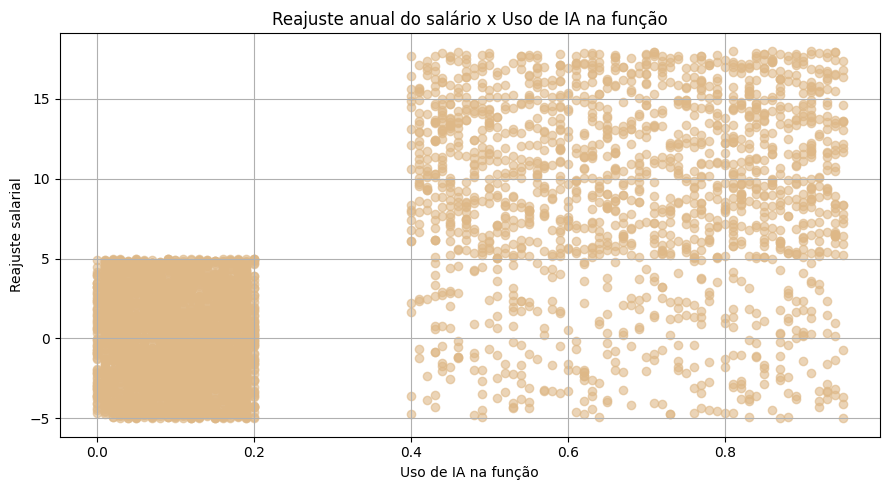

A correlação entre reajuste anual do salário e uso de IA na função é igual a: 0.67


In [296]:
plt.figure(figsize = (9,5))
plt.scatter(df["Intensidade_de_IA"], df["salary_change_vs_prev_year_percent"], alpha=0.6, color = "burlywood")
plt.title("Reajuste anual do salário x Uso de IA na função")
plt.ylabel("Reajuste salarial")
plt.xlabel("Uso de IA na função")
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"A correlação entre reajuste anual do salário e uso de IA na função é igual a: {df["Intensidade_de_IA"].corr(df["salary_change_vs_prev_year_percent"]):.2f}")

A correlação entre salário e risco de automação é igual a: -0.43


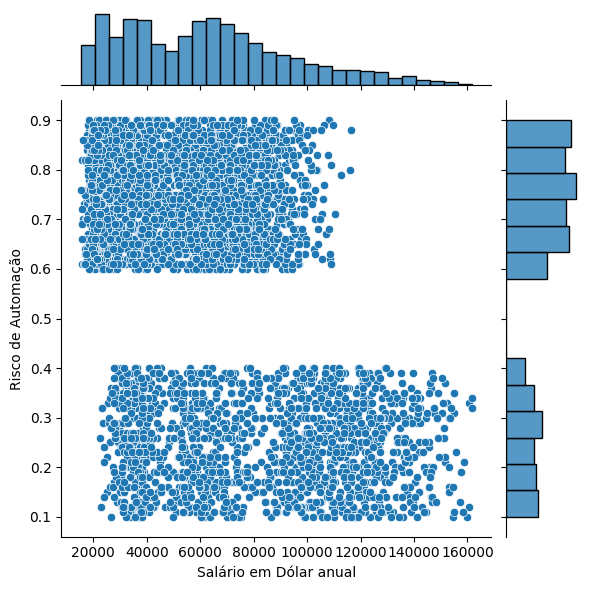

In [297]:
df.rename(columns={
    'Salário_em_Dólar' : 'Salário em Dólar anual',
    'Risco_de_Automação' : 'Risco de Automação',
    }, inplace=True)
sns.jointplot(data = df, x='Salário em Dólar anual', y='Risco de Automação');

print(f"A correlação entre salário e risco de automação é igual a: {df["Salário em Dólar anual"].corr(df["Risco de Automação"]):.2f}")